In [1]:
%matplotlib inline
import tempfile

from io import BytesIO
from urllib import request
from zipfile import ZipFile

import matplotlib
import pandas as pd

from cartopy import crs as ccrs
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
from matplotlib import pyplot as plt
import cartopy.io.shapereader as shpreader

plt.rcParams['figure.figsize'] = [20, 10]

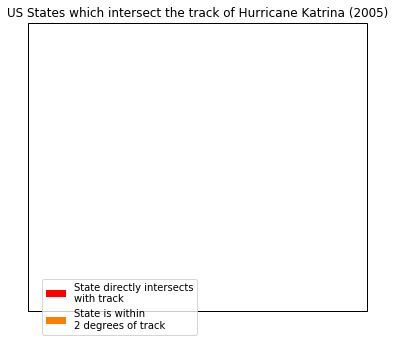

In [6]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


def sample_data():
    """
    Returns a list of latitudes and a list of longitudes (lons, lats)
    for Hurricane Katrina (2005).

    The data was originally sourced from the HURDAT2 dataset from AOML/NOAA:
    http://www.aoml.noaa.gov/hrd/hurdat/newhurdat-all.html on 14th Dec 2012.

    """
    lons = [-75.1, -75.7, -76.2, -76.5, -76.9, -77.7, -78.4, -79.0,
            -79.6, -80.1, -80.3, -81.3, -82.0, -82.6, -83.3, -84.0,
            -84.7, -85.3, -85.9, -86.7, -87.7, -88.6, -89.2, -89.6,
            -89.6, -89.6, -89.6, -89.6, -89.1, -88.6, -88.0, -87.0,
            -85.3, -82.9]

    lats = [23.1, 23.4, 23.8, 24.5, 25.4, 26.0, 26.1, 26.2, 26.2, 26.0,
            25.9, 25.4, 25.1, 24.9, 24.6, 24.4, 24.4, 24.5, 24.8, 25.2,
            25.7, 26.3, 27.2, 28.2, 29.3, 29.5, 30.2, 31.1, 32.6, 34.1,
            35.6, 37.0, 38.6, 40.1]

    return lons, lats


def main():
    ax = plt.axes([0, 0, 1, 1],
                  projection=ccrs.LambertConformal())

    ax.set_extent([-10, 10, 20, 50], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_lakes_shp'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)

    lons, lats = sample_data()

    # to get the effect of having just the states without a map "background"
    # turn off the outline and background patches
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)

    plt.title('US States which intersect the track '
              'of Hurricane Katrina (2005)')

    # turn the lons and lats into a shapely LineString
    track = sgeom.LineString(zip(lons, lats))

    # buffer the linestring by two degrees (note: this is a non-physical
    # distance)
    track_buffer = track.buffer(2)

    for state in shpreader.Reader(states_shp).geometries():
        # pick a default color for the land with a black outline,
        # this will change if the storm intersects with our track
        facecolor = [0.9375, 0.9375, 0.859375]
        edgecolor = 'black'

        if state.intersects(track):
            facecolor = 'red'
        elif state.intersects(track_buffer):
            facecolor = '#FF7E00'

        ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)

    ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                      facecolor='#C8A2C8', alpha=0.5)
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none')

    # make two proxy artists to add to a legend
    direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
    within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
    labels = ['State directly intersects\nwith track',
              'State is within \n2 degrees of track']
    plt.legend([direct_hit, within_2_deg], labels,
               loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)

    plt.show()
main()

/home/fernandezjm/.virtualenvs/curso_python/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lakes_shp.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


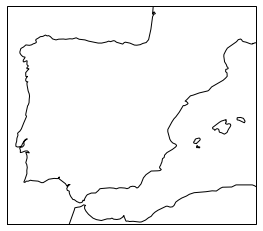

In [434]:
iberia = plt.axes(projection=ccrs.GOOGLE_MERCATOR)
iberia.coastlines(resolution='50m')

iberia.set_extent([-10, 5, 35, 45])

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='50m',
                                     category='cultural', name=shapename)
states = (state for state in shpreader.Reader(states_shp).geometries())

In [435]:
states = (state for state in shpreader.Reader(states_shp).geometries())
    

In [442]:
geo = shpreader.Reader(states_shp).records()
# -*- coding: utf-8 -*-
list(geo)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf4 in position 4: invalid continuation byte

In [ ]:
pdb.pm()

> /home/fernandezjm/.virtualenvs/curso_python/lib/python3.7/site-packages/shapefile.py(104)u()
-> return v.decode(encoding, encodingErrors)
(Pdb) u
> /home/fernandezjm/.virtualenvs/curso_python/lib/python3.7/site-packages/shapefile.py(987)__record()
-> value = u(value, self.encoding, self.encodingErrors)
(Pdb) value
b'Rond\xf4nia                                                                                            '
(Pdb) self.encoding
'utf-8'
(Pdb) self.encodingErrors
'strict'
(Pdb) value
b'Rond\xf4nia                                                                                            '


In [4]:
mapamundi = plt.subplot(121, projection=ccrs.PlateCarree())
mapamundi.coastlines()
mapamundi.stock_img()

mercator = plt.subplot(122, projection=ccrs.Mercator())
mercator.coastlines();


NameError: name 'plt' is not defined

In [221]:
def descarga_cartografia():
    ficheros = []
    URL = 'https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_ESP_shp.zip'
    try:
        temp_dir = tempfile.gettempdir()
        with request.urlopen(URL) as shapes_zip, ZipFile(BytesIO(shapes_zip.read())) as download:
            ficheros = [download.extract(f, temp_dir)
                        for f in download.namelist()]
    except (zipfile.BadZipfile, zipfile.LargeZipFile) as exc:
        print('Error en fichero ZIP: {0}'.format(zip_file))
    for fichero in ficheros:
        if fichero.upper().endswith('.SHP') and 'ESP_2' in fichero.upper():
            return fichero

    
# shapes_file = '/home/fernandezjm/Downloads/Provincias_ETRS89_30N.zip'
# try:
#     temp_dir = tempfile.gettempdir()
#     with open(shapes_file, 'rb') as shapes_zip, ZipFile(BytesIO(shapes_zip.read())) as download:
#         shapefiles = [download.extract(f, temp_dir)
#                      for f in download.namelist()]
# except (zipfile.BadZipfile, zipfile.LargeZipFile) as exc:
#     print('Bad ZIP file: {0}'.format(zip_file))

In [222]:
fichero = descarga_cartografia()

In [224]:
import shapefile

In [225]:
shp = shapefile.Reader(busca_fichero(shapefiles))

In [226]:
len(list(shp.iterShapes()))

52

In [229]:
prov=next(shp.iterShapeRecords())

In [237]:
prov.shape.

In [14]:

import shapefile

rdr =shapefile.Reader('/tmp/Provincias_ETRS89_30N.shp')

In [15]:
sp = list(rdr.iterShapeRecords())
sp2 = list(rdr.iterShapes())[0]

sp.record

ShapefileException: Shapefile Reader requires a shapefile or file-like object. (no dbf file found)

In [49]:
marriages = pd.read_csv('http://www.ine.es/jaxi/files/_px/es/csv_sc/t20/e301/provi/03009.csv_sc',
                        sep=';', encoding='utf-8',
                        na_values='..',
                        header=[4, 5], index_col=0)[:-2]
marriages.drop(marriages.columns[-1], axis=1, inplace=True)

meses = marriages.columns.get_level_values(0)[0::5].values.repeat(5)
marriages.columns = pd.MultiIndex.from_tuples(zip(meses, marriages.columns.get_level_values(1)))
provincias = ['Cantabria', 'Madrid', 'Murcia', 'León', 'Albacete']
marriages.Total.loc[provincias].plot.bar(stacked=True, table=True)

In [65]:
prov_index = list(map(lambda t: t.split('/')[0].split(',')[0], list(marriages.index)))

In [120]:
dataset_prov_names = list(map(lambda t: t.split('/')[0].split(' ')[0], list(marriages.index)))

for sp in rdr.iterShapeRecords():
    prov_names = sp.record[1:3]
    for (i, prov_name) in enumerate(prov_names):
        if type(prov_name) is bytes:
            prov_names[i] = prov_name.decode('latin-1')
    for p in prov_names:
        try:
            i = dataset_prov_names.index(p)
            break
#     if any(p for p in prov_names in dataset_prov_names)
#     print(prov_names, any(prov.split(' ')[-1] in dataset_prov_names for prov in prov_names))
# prov_index
# records = [sp.record for sp in rdr.iterShapeRecords()]
# [r.decode('latin-1') for record in records for r in record if type(r) == bytes][0::2]
# dataset_prov_names
#     for prov_name in prov_names:
#         print(prov_name.split(' ')[-1], prov_name.split(' ')[-1] in dataset_prov_names)
dataset_prov_names.index('Araeba')

ValueError: 'Álava' is not in list

In [104]:
any(prov in dataset_prov_names for prov in prov_names)

True

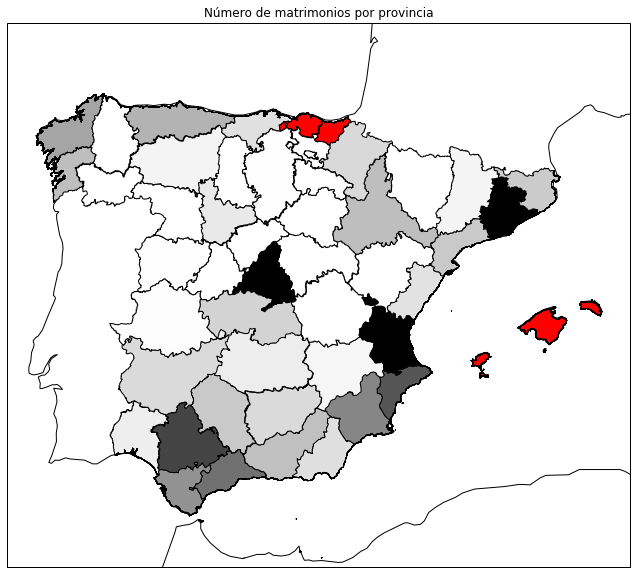

In [370]:
iberia = plt.axes(projection=ccrs.GOOGLE_MERCATOR)
iberia.coastlines(resolution='50m')

iberia.set_extent([-10, 5, 35, 45])


norm = matplotlib.colors.Normalize(vmin=marriages.Total.min(), vmax=marriages.Total.max())
cmap=plt.cm.gray_r

for province in Reader(shapefile).iterShapeRecords():
    province_name = province.attributes['NAME_2'].split(' ')[-1]
    marriage_record = marriages.iloc[:, 0].str.contains(province_name)
    
    if any(marriage_record):
        facecolor = cmap(norm(float(marriages.Total[marriage_record])))
    else:
        facecolor = 'red'  # no data
    
    shape = ShapelyFeature(province.geometry,
                           ccrs.PlateCarree(),
                           facecolor=facecolor,
                           edgecolor='black')
    iberia.add_feature(shape)

plt.title('Número de matrimonios por provincia');